In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_tags = ['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [38]:
df_by_cols = {k: None for k in all_tags}
for tag in all_tags:
    column_file = f'submission_{tag}.csv'
    df = pd.read_csv(column_file)
    df_by_cols[tag] = df
    print(df.head())
    if tag == 'agriculture':
        result = df_by_cols[tag]
        continue
    result = result.merge(df_by_cols[tag], on='image_name')

  image_name  agriculture
0     file_0            0
1     file_1            1
2    file_10            1
3   file_100            0
4  file_1000            0
  image_name  artisinal_mine
0     file_0               0
1     file_1               0
2    file_10               0
3   file_100               0
4  file_1000               0
  image_name  bare_ground
0     file_0            0
1     file_1            1
2    file_10            0
3   file_100            0
4  file_1000            0
  image_name  blooming
0     file_0         1
1     file_1         1
2    file_10         0
3   file_100         1
4  file_1000         0
  image_name  blow_down
0     file_0          1
1     file_1          0
2    file_10          0
3   file_100          1
4  file_1000          0
  image_name  clear
0     file_0      1
1     file_1      0
2    file_10      0
3   file_100      1
4  file_1000      1
  image_name  cloudy
0     file_0       0
1     file_1       0
2    file_10       1
3   file_100       0
4  file

In [39]:
result.head()

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,file_0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0
1,file_1,1,0,1,1,0,0,0,1,1,1,0,1,0,1,1,0,1
2,file_10,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,file_100,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,1
4,file_1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [40]:
def encode_tags(row):
    result_tags = []
    for tag in all_tags:
        if row[tag] == 1:
            result_tags.append(tag)
    return ' '.join(result_tags)
result['tags'] = result.apply(encode_tags, axis=1)

In [41]:
result

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water,tags
0,file_0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,blooming blow_down clear conventional_mine pri...
1,file_1,1,0,1,1,0,0,0,1,1,1,0,1,0,1,1,0,1,agriculture bare_ground blooming conventional_...
2,file_10,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,agriculture cloudy haze road water
3,file_100,0,0,0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,blooming blow_down clear cultivation haze prim...
4,file_1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,clear selective_logging
5,file_10000,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,blow_down clear habitation primary selective_l...
6,file_10001,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,agriculture artisinal_mine conventional_mine c...
7,file_10002,1,0,1,0,1,1,0,0,0,1,1,0,0,1,1,1,1,agriculture bare_ground blow_down clear habita...
8,file_10003,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,agriculture clear cultivation haze primary sel...
9,file_10004,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,blooming blow_down cloudy partly_cloudy primary


In [42]:
df = result
all_tags_dict = {k: 0 for k in all_tags}
for i, row in df.iterrows():
    for tag in row['tags'].split():
        all_tags_dict[tag] += 1
print(all_tags_dict)

{'agriculture': 23705, 'artisinal_mine': 20251, 'bare_ground': 23049, 'blooming': 20358, 'blow_down': 25575, 'clear': 36422, 'cloudy': 15291, 'conventional_mine': 22202, 'cultivation': 20581, 'habitation': 19007, 'haze': 19467, 'partly_cloudy': 17240, 'primary': 36292, 'road': 21158, 'selective_logging': 24171, 'slash_burn': 23437, 'water': 21690}


['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy', 'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road', 'selective_logging', 'slash_burn', 'water'] [23705, 20251, 23049, 20358, 25575, 36422, 15291, 22202, 20581, 19007, 19467, 17240, 36292, 21158, 24171, 23437, 21690]
                 tag       num
0              clear  0.595218
1            primary  0.593094
2          blow_down  0.417954
3  selective_logging  0.395009
4        agriculture  0.387394


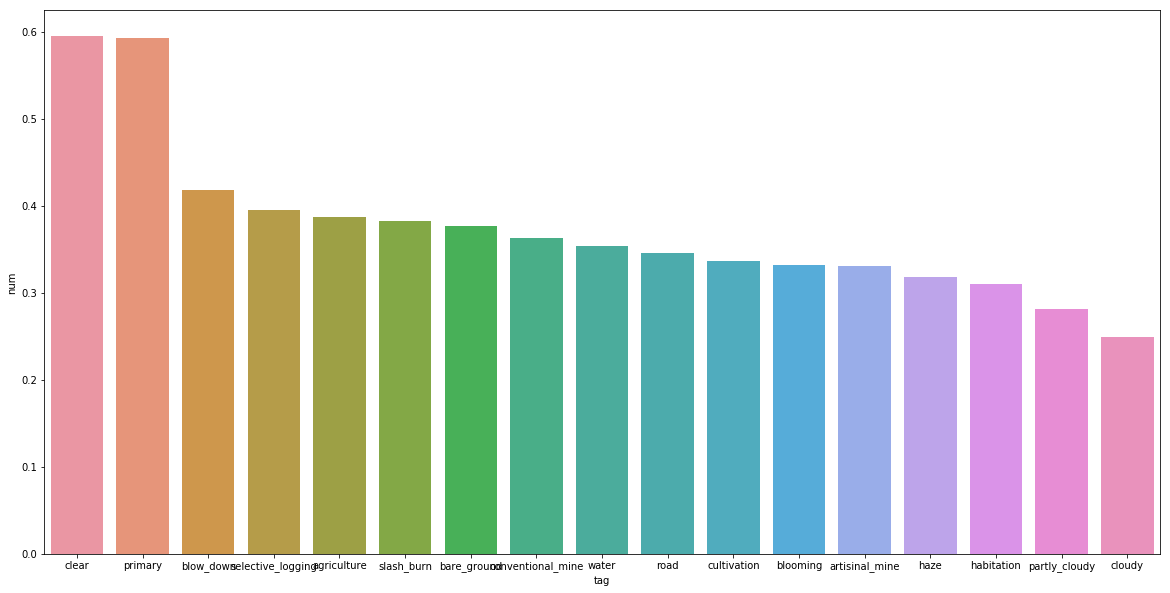

In [43]:
all_tag_values = []
for tag in all_tags:
    all_tag_values.append(all_tags_dict[tag])
print(all_tags, all_tag_values)
sorted_tags, sorted_tag_nums = zip(*sorted(zip(all_tags, all_tag_values), key=lambda x: x[1], reverse=True))
tags_df = pd.DataFrame()
tags_df['tag'] = sorted_tags
tags_df['num'] = sorted_tag_nums
tags_df.sort_values('num', ascending=False, inplace=True)
tags_df['num'] = tags_df['num'] / len(df)
print(tags_df.head())
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='tag', y='num', data=tags_df, ax=ax)

In [34]:
final_result = result[['image_name', 'tags']]

In [35]:
final_result.head()

,image_name,tags
0,file_0,blooming blow_down clear conventional_mine pri...
1,file_1,agriculture bare_ground blooming conventional_...
2,file_10,agriculture cloudy haze road water
3,file_100,blooming blow_down clear cultivation haze prim...
4,file_1000,clear selective_logging


In [36]:
final_result.to_csv('final_submission.csv', index=False)